Epoch 0, Loss: 0.6931343933636555
Epoch 100, Loss: 0.6926337910984265
Epoch 200, Loss: 0.680494326713883
Epoch 300, Loss: 0.569505296250882
Epoch 400, Loss: 0.40073917903550266
Epoch 500, Loss: 0.3061539392519224
Epoch 600, Loss: 0.2557174510606523
Epoch 700, Loss: 0.22578492130290098
Epoch 800, Loss: 0.20673660682614187
Epoch 900, Loss: 0.19402827141973486


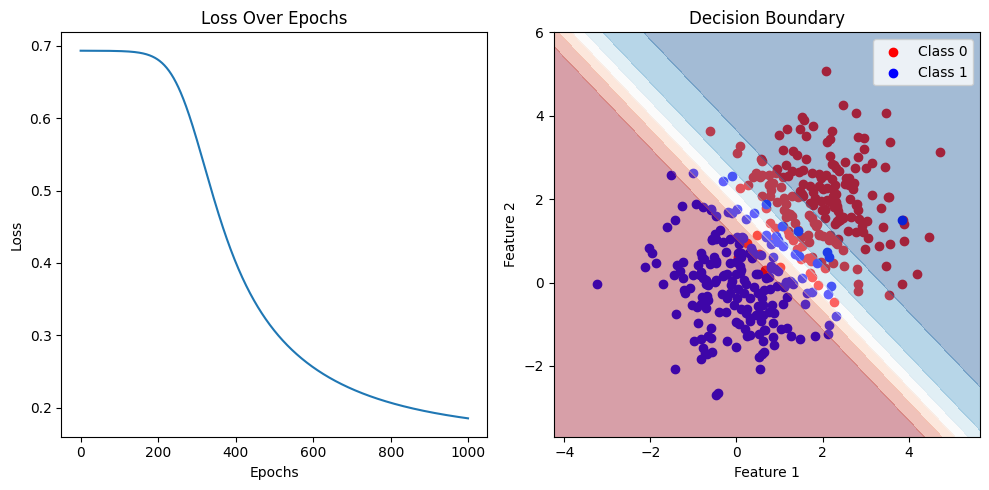

In [4]:
import numpy as np
import matplotlib.pyplot as plt


class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(hidden_size, input_size) * 0.01
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) * 0.01
        self.b2 = np.zeros((output_size, 1))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def forward_propagation(self, X):
        # Hidden layer
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = self.sigmoid(self.Z1)

        # Output layer
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self.sigmoid(self.Z2)

        return self.A2

    def compute_loss(self, predicted, actual):
        # Binary cross-entropy loss
        m = actual.shape[1]
        loss = -np.sum(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted)) / m
        return loss

    def backward_propagation(self, X, Y):
        m = X.shape[1]

        # Output layer gradients
        dZ2 = self.A2 - Y
        dW2 = np.dot(dZ2, self.A1.T) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m

        # Hidden layer gradients
        dZ1 = np.dot(self.W2.T, dZ2) * self.sigmoid_derivative(self.A1)
        dW1 = np.dot(dZ1, X.T) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m

        return dW1, db1, dW2, db2

    def update_parameters(self, dW1, db1, dW2, db2, learning_rate):
        # Update weights and biases
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, Y, epochs, learning_rate):
        loss_history = []

        for epoch in range(epochs):
            # Forward propagation
            predicted = self.forward_propagation(X)

            # Compute loss
            loss = self.compute_loss(predicted, Y)
            loss_history.append(loss)

            # Backward propagation
            dW1, db1, dW2, db2 = self.backward_propagation(X, Y)

            # Update parameters
            self.update_parameters(dW1, db1, dW2, db2, learning_rate)

            # Print loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

        return loss_history


# Generate synthetic binary classification dataset
def generate_data():
    np.random.seed(42)
    X = np.random.randn(2, 400)
    Y = np.zeros((1, 400))

    # Create two clusters
    Y[0, :200] = 1  # First half labeled as 1
    X[0, :200] += 2  # Shift first cluster
    X[1, :200] += 2

    return X, Y


# Demonstration
def main():
    # Generate dataset
    X, Y = generate_data()

    # Create and train neural network
    nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
    loss_history = nn.train(X, Y, epochs=1000, learning_rate=0.1)

    # Visualization
    plt.figure(figsize=(10, 5))

    # Plot loss history
    plt.subplot(1, 2, 1)
    plt.plot(loss_history)
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    # Plot decision boundary
    plt.subplot(1, 2, 2)
    plt.scatter(X[0, :200], X[1, :200], c='red', label='Class 0')
    plt.scatter(X[0, 200:], X[1, 200:], c='blue', label='Class 1')

    # Create mesh to plot decision boundary
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict for mesh points
    Z = []
    for x1, x2 in zip(xx.ravel(), yy.ravel()):
        x = np.array([[x1], [x2]])
        Z.append(nn.forward_propagation(x)[0, 0])
    Z = np.array(Z).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()